# Running PDC Periodogram with Errors - Tutorial
-----------------------------------

### 1 Using the PeriodicityDetector class to run PDC with errors on simulated velocity times series

`Observations` class enables one to load observation data from a given folder 
and place it into a TimeSeries object, or to load an existing time series. 
In this case we will choose the latter. 

In [1]:
import sys, random, numpy as np
import matplotlib.pyplot as plt

In [2]:
# A time series object is the place holder for the set
# of spectra an\or velocities we wish to analyze. 
from sparta.Auxil.TimeSeries import TimeSeries

# Observations class recieves a TimeSeries object and
# manages the relevant routines.
from sparta import Observations

# Is we wish ot directly hangle datasets of spectra, 
# this is done using the Spectrum class.
from sparta.UNICOR.Spectrum import Spectrum

# The Template class is a wrapper foor the spectrum class,
# that enables retrieval of spectra from online PHOENIX 
# repositories, and some additional features.
from sparta.UNICOR.Template import Template

In the example below we simulate a simple sinusoidal RV curve (i.e. corresponding to an almost circular orbit), with a semi-amplitude of k = 10 cm s−1 and a period of 365 days, and sampled it in randomly drawn 35 epochs from a uniform distri butionon an interval of 1,000 days.

Noise added to each measurement was drawn individually for each measurement from a normal distribution centered around 0, with the distributions standard deviations (STDs) drawn from an exponential distribution with a scale fator of 1 m s−1.

The same STDs were paired with the simulated measurements as their error bars.

In [3]:
# Generate timeseries as a sinewave with some noise...
seed = 4172
random.seed(seed)
np.random.seed(seed)

period = 365
size = 20 + int(random.random() * 50)
size = size - (size % 5)

k = 0.0001
k_noise = 0.001


times = [(random.random() * 1_000) for _ in range(size)]
vals = [np.sin(t * 2 * np.pi / period) * k for t in times]

noise_stds = np.random.exponential(k, size)
noise = np.random.normal(0, np.array(noise_stds), size)

vals_final = np.array(vals) + np.array(noise)

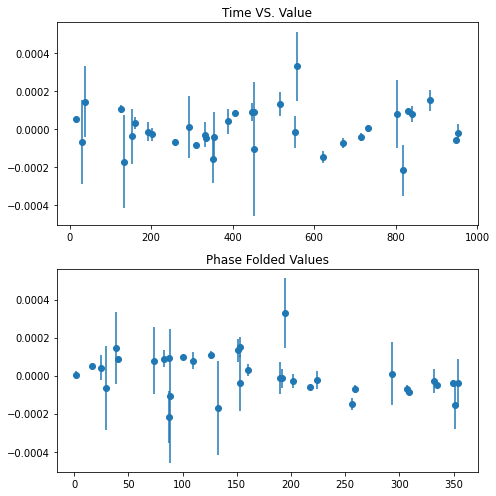

In [4]:
# # Read the data into the time series
time_series = TimeSeries(size=len(vals), times=times, vals=vals_final, errors=noise_stds, fold_period=period) # data.t.values*365

# # You can plot it if you want
time_series.plot_velocities()


#### The Observations class recieves the TimeSeries object, and initialized


In [5]:
# If we wish the Observations object to read a set of spectra
# we can initialize it with some requirements, such as the wavelength range 
# that we wish to use of the SNR limits. The simplest thing to do, though, 
# is probably feeding it with a timeseries object directly.

obs = Observations(time_series=time_series)

In [6]:
# Another initizalization that is required, is the initialization of the frequency
# grid. This is slightly weird, but we have several different periodograms
# and dound it useful that they use the same rage by default. 
# This row essentially initializes a PeriodicityDetector object and puts it in
# observations, where the data are stored.

obs.initialize_periodicity_detector(periodogram_grid_resolution=25_000, freq_range=(0.001, 0.1))

<br />
Now using the PeriodicityDetector to detect periodicity in the data using the GLS and PDC method is posible.

Note that we don't use the errors at this stage, and the correct periodicity is not significantly detected.

<br />

In [7]:
_ = obs.periodicity_detector.calc_PDC(errors=False)
_ = obs.periodicity_detector.calc_GLS()

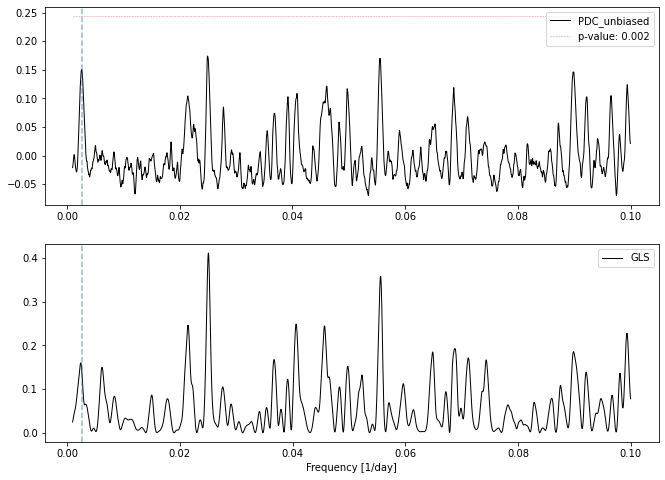

In [8]:
# If we have a suspected period, we can provide it so that it is 
# plotted as a vertical line inf the periodogram
obs.periodicity_detector.period_truth = [period]
obs.periodicity_detector.plot_periodograms(annotate_pval=[2 * 1e-3])

<br />
We will now use the PDC Periodogram with Errors:
<br />

In [9]:
_ = obs.periodicity_detector.calc_PDC(errors=True)
_ = obs.periodicity_detector.calc_GLS()

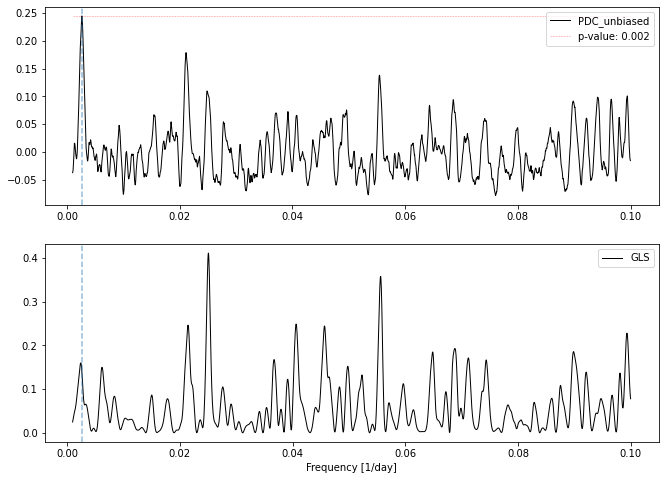

In [10]:
# If we have a suspected period, we can provide it so that it is 
# plotted as a vertical line inf the periodogram
obs.periodicity_detector.period_truth = [period]
obs.periodicity_detector.plot_periodograms(annotate_pval=[2 * 1e-3])